In [1]:
# Code Cell 1: 导入库并加载数据
import pandas as pd
from matplotlib import pyplot as plt
import io
import numpy as np

# 设置 Pandas 显示格式，方便我们看浮点数
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# === 数据集加载 (这是一个包含 1400 行数据的 CSV 字符串) ===
# 每一行代表：早餐摄入卡路里 (calories), 数学测验分数 (test_score)
# 数据结构：50个学生，连续记录28天 (50 * 28 = 1400 行)
# 行 0-49 是第一天，50-99 是第二天，以此类推。

dataset = '''calories,test_score
201,76
142,72
397,84
294,79
334,76
173,60
117,59
174,60
333,80
383,83
77,59
39,62
242,73
7,51
140,63
73,66
102,61
5,48
339,88
388,92
374,86
358,81
292,76
167,70
300,80
348,77
68,49
1,55
198,63
154,74
220,75
9,58
129,56
108,55
356,81
383,96
299,86
107,62
117,67
103,54
110,56
80,57
125,57
132,71
176,73
390,98
199,63
5,56
99,56
39,49
251,67
71,57
7,52
28,49
139,61
227,77
268,82
113,70
32,57
1,51
217,64
248,67
76,60
388,90
9,43
315,86
49,47
97,53
251,72
224,65
299,75
325,81
45,47
203,67
326,83
329,82
282,79
203,61
117,63
218,68
262,75
73,64
205,69
54,51
296,83
132,63
16,45
363,80
138,62
181,64
13,49
294,86
374,85
338,79
375,87
260,80
375,93
234,74
103,64
322,75
210,64
280,79
110,65
329,87
94,55
399,88
264,81
88,61
34,48
373,81
268,80
333,87
208,71
109,68
142,57
39,63
84,66
263,78
247,74
172,74
303,79
92,60
107,62
49,54
293,73
238,72
341,85
48,54
25,52
189,69
230,74
206,78
190,63
237,68
305,72
22,55
223,70
62,62
25,50
115,67
220,81
123,62
210,72
39,57
13,53
88,63
56,62
285,83
50,51
369,94
174,60
206,63
236,77
370,90
66,53
178,72
167,71
133,71
157,64
298,78
1,58
99,55
324,91
389,97
107,68
371,93
36,55
365,90
131,71
132,63
149,70
126,68
254,78
294,71
75,57
224,67
221,78
219,71
307,81
205,64
209,70
382,90
396,98
118,60
367,89
367,83
203,65
33,49
395,97
154,60
205,79
188,63
345,76
258,80
258,70
353,79
282,86
356,91
367,81
91,67
183,82
47,58
118,72
157,83
70,58
172,93
45,58
28,50
92,74
187,80
10,60
76,70
174,81
111,79
91,75
168,83
29,48
181,90
122,80
63,71
193,85
186,82
145,71
77,62
193,87
100,61
71,71
154,78
52,59
46,65
66,55
62,62
51,57
41,67
24,57
186,80
4,59
77,70
29,63
28,49
61,65
26,58
127,83
199,97
68,61
145,84
102,62
50,67
93,70
169,85
119,67
312,78
341,78
67,66
17,48
45,52
24,48
47,58
102,55
280,82
220,73
192,61
269,83
373,81
160,71
290,84
264,76
48,55
269,75
204,76
282,80
112,68
390,87
270,74
247,72
16,46
363,89
133,65
185,64
331,92
16,53
310,87
66,48
128,71
160,72
308,76
225,64
34,56
222,77
392,85
97,53
222,68
302,87
378,85
61,61
161,63
129,57
43,54
116,62
173,71
189,65
361,80
187,77
314,73
341,91
165,59
44,63
184,75
341,82
119,55
70,63
165,68
394,92
80,54
65,61
29,55
64,65
310,83
384,91
304,88
216,66
6,53
55,57
249,84
395,81
41,50
334,86
394,97
100,56
125,61
14,49
61,53
143,72
373,86
238,77
138,59
388,88
357,79
20,54
82,52
261,75
210,73
15,52
210,69
364,92
365,95
132,55
143,68
40,50
88,64
35,55
18,44
56,47
109,55
268,78
178,67
399,82
11,45
235,74
215,73
200,69
220,78
249,82
250,79
121,68
210,71
165,70
265,79
290,87
384,88
207,69
16,54
193,62
307,75
292,76
312,78
345,83
67,56
180,75
126,69
299,86
143,60
251,66
371,86
25,59
27,56
159,59
125,69
114,56
66,50
240,82
184,68
196,74
21,44
254,73
364,86
127,59
347,93
157,71
161,65
315,83
57,50
276,79
69,49
300,79
83,56
199,75
367,95
247,83
15,49
136,72
341,87
129,67
284,82
248,70
68,55
320,81
280,80
36,62
272,85
171,76
161,74
307,77
365,84
159,58
299,86
45,58
244,73
215,68
60,50
259,75
269,76
382,88
61,48
185,74
40,61
373,87
326,86
373,93
77,55
358,94
70,48
303,87
220,68
85,64
224,81
94,55
167,63
329,86
137,60
246,76
112,62
22,47
99,53
58,55
170,61
196,73
105,58
241,80
259,84
248,71
357,92
262,75
105,60
37,58
347,88
106,54
102,57
184,70
166,68
63,64
301,85
306,72
44,52
331,90
159,67
72,53
208,77
284,83
168,74
198,66
291,84
218,80
74,49
279,82
244,83
263,74
287,79
194,77
359,84
364,85
391,82
278,78
13,51
111,60
169,72
339,78
213,69
95,65
159,58
214,64
3,47
234,77
332,75
308,87
196,73
95,59
350,77
29,60
220,69
187,77
50,52
91,64
326,82
236,70
247,70
174,70
213,63
184,68
79,53
121,67
363,89
149,72
275,77
320,77
319,80
128,54
319,83
361,88
49,57
374,92
333,83
188,68
242,82
376,93
107,58
282,72
0,42
26,58
209,79
58,55
182,68
227,68
48,54
347,82
28,60
79,49
155,69
193,78
282,77
180,95
176,87
51,69
137,76
158,78
102,62
170,92
101,69
44,63
199,84
39,50
43,59
15,57
55,64
162,91
39,61
12,45
84,64
13,48
171,93
127,73
1,50
66,65
2,53
92,60
193,91
36,51
31,54
199,90
5,56
103,65
124,76
80,58
0,49
51,67
108,81
66,66
96,72
54,61
85,71
122,72
99,75
135,82
30,59
58,56
116,81
78,60
119,79
47,63
74,66
224,64
237,81
267,71
262,68
314,76
354,84
232,71
72,55
98,57
55,56
244,78
222,65
364,80
4,46
342,82
341,85
200,71
208,65
339,80
128,65
189,64
10,45
278,74
208,79
257,79
232,69
148,58
146,61
158,64
215,69
344,84
352,85
65,55
254,67
273,85
256,71
107,66
169,75
34,61
360,90
282,78
36,46
289,80
186,62
18,45
190,60
244,74
191,74
389,82
355,90
70,57
10,52
120,61
204,70
199,70
131,58
399,88
111,67
36,60
22,46
385,91
59,57
41,56
181,60
338,81
335,77
390,97
271,75
167,63
349,76
325,77
90,67
292,81
298,86
185,74
25,51
218,69
42,57
377,91
332,90
1,53
9,43
298,85
186,63
40,51
74,49
259,76
375,87
51,60
165,70
280,78
92,55
316,79
358,92
43,58
294,74
199,76
121,57
311,88
205,79
87,64
3,59
128,55
183,69
339,91
101,63
181,68
361,83
371,94
76,49
252,67
102,55
1,53
234,80
217,64
351,92
360,95
336,81
19,50
353,76
154,59
263,84
249,76
118,65
187,70
277,72
293,71
220,76
289,72
250,71
136,66
96,55
284,73
270,82
238,75
347,77
322,83
13,50
79,57
33,58
11,58
34,58
376,90
242,79
351,82
57,51
22,50
226,77
228,68
253,71
363,86
144,68
55,55
98,59
373,86
85,51
128,61
332,81
59,57
55,47
351,81
96,51
309,88
323,80
105,59
290,73
377,82
352,80
276,71
251,77
224,81
277,86
141,66
143,64
111,63
253,71
354,94
122,67
358,79
86,52
222,80
130,65
53,52
318,88
219,72
221,67
191,66
82,64
35,57
176,65
110,53
252,71
21,60
12,43
63,52
85,64
118,64
215,70
27,52
142,66
387,80
334,82
147,56
154,67
285,84
371,80
358,89
144,56
283,76
44,61
298,79
318,74
74,54
229,68
308,89
391,95
377,93
117,60
385,92
391,94
244,66
350,87
272,72
268,77
293,86
188,68
171,63
250,79
239,68
389,88
92,67
129,57
348,89
278,84
160,69
245,66
275,77
249,74
332,81
388,90
158,65
60,62
325,87
216,72
31,55
397,86
271,76
192,70
59,50
195,72
383,81
267,81
279,76
135,64
362,85
37,50
384,84
49,60
49,60
115,56
199,68
203,65
326,75
333,92
153,62
248,72
212,69
38,49
361,87
302,86
381,94
43,62
79,55
274,74
44,47
252,79
188,62
357,84
94,65
143,66
60,49
26,56
193,65
363,84
322,87
120,67
248,73
312,89
298,81
142,73
261,85
272,72
49,58
249,74
204,79
34,58
69,53
180,71
210,70
59,53
47,58
39,66
192,97
177,91
109,69
177,82
67,66
107,71
70,58
185,93
49,53
126,74
96,64
37,48
152,79
67,72
177,86
13,61
123,67
154,75
81,69
93,73
66,72
61,67
53,58
152,81
112,72
8,43
159,77
9,53
133,76
110,75
25,59
144,83
155,81
1,45
50,60
6,55
116,70
117,82
135,74
93,64
190,90
55,65
189,85
60,64
183,95
75,57
135,70
156,80
276,83
298,72
146,70
339,76
46,53
0,55
355,87
53,61
75,56
233,67
336,92
342,89
378,85
319,84
216,75
72,52
232,81
156,74
281,75
398,95
312,90
285,83
228,79
288,85
145,61
0,45
159,74
383,85
121,69
28,59
263,72
72,52
70,60
73,64
9,47
320,87
155,66
273,70
187,67
372,93
324,74
13,46
1,43
263,73
28,57
102,64
390,88
386,82
45,50
10,44
216,79
17,59
221,78
398,81
95,51
340,78
29,62
145,57
80,49
196,65
299,86
42,60
158,58
392,89
130,56
299,88
18,59
4,52
337,77
290,73
58,59
136,59
270,83
161,75
376,97
100,65
341,83
250,70
213,73
344,93
287,83
18,58
290,71
229,76
66,53
344,81
392,84
254,80
4,44
298,72
58,49
342,77
227,72
184,63
33,52
112,69
101,57
310,74
152,64
303,83
301,82
385,95
370,91
285,70
341,85
41,47
311,89
127,62
174,74
264,79
125,70
213,74
148,63
303,87
392,91
205,77
139,65
273,73
116,62
169,60
71,58
141,72
236,77
163,58
221,66
303,89
89,57
258,77
326,83
181,73
97,68
255,77
218,71
345,93
16,48
77,53
368,88
69,57
129,66
257,82
346,83
383,81
320,84
315,86
89,54
252,75
124,60
65,65
365,78
363,94
168,60
112,60
259,75
384,97
100,64
382,81
87,66
124,54
249,68
341,92
134,65
210,76
386,92
287,87
328,85
376,85
333,78
319,82
313,88
223,66
230,75
103,66
256,79
368,84
309,88
129,58
187,75
388,89
257,79
210,70
168,66
325,78
318,84
336,87
233,73
374,81
93,56
23,59
390,82
97,64
385,92
386,89
209,63
30,49
335,85
295,77
70,58
247,67
107,62
347,91
72,63
46,53
41,48
114,54
145,67
373,86
124,53
387,97
18,46
85,67
344,93
142,56
243,67
87,65
258,70
290,87
399,96
137,58
48,59
157,67
148,64
9,56
175,60
290,81
100,52
233,66
41,46
100,64
49,56
235,80
308,79
322,89
148,60
33,55
397,91
75,57
6,47
102,59
166,75
60,59
54,62
352,80
353,79
380,81
283,81
395,91
69,64
184,69
64,59
98,56
92,60
291,75
343,93
322,78
29,45
17,46
362,78
179,73
64,56
4,59
59,49
267,73
4,44
388,85
311,78
257,69
346,82
188,73
185,66
41,55
179,63
340,81
112,58
99,61
364,82
253,67
145,61
195,69
214,73
346,81
356,86
215,78
394,81
277,77
199,75
35,62
62,64
161,65
138,68
37,49
6,55
169,67
10,58
30,56
190,61
36,53
221,74
134,66
297,73
36,49
8,48
58,56
45,63
148,83
90,74
187,89
111,70
33,60
75,62
71,73
79,65
87,59
36,64
139,85
3,58
32,50
58,63
72,65
50,53
39,63
7,47
97,71
120,77
78,58
22,59
9,52
60,64
132,76
93,68
102,72
72,68
151,83
46,54
56,63
85,69
100,69
186,96
11,55
150,81
144,85
82,71
93,72
71,57
59,70
118,79
126,67
117,73
164,90
142,73
102,64
359,77
240,80
42,59
186,75
170,61
327,89
382,86
216,70
249,81
139,61
258,68
153,62
230,70
104,59
207,76
212,72
354,81
139,57
43,60
24,53
0,57
146,57
150,56
192,78
383,96
127,67
52,61
20,56
47,51
39,58
75,62
106,53
31,55
112,57
214,68
330,84
130,59
282,82
167,63
279,76
136,57
35,53
373,81
69,51
179,66
361,89
88,55
327,79
398,83
237,76
175,68
112,68
372,96
229,70
112,57
331,85
157,73
36,52
64,54
237,78
343,86
141,56
394,85
151,58
193,62
289,70
285,70
359,90
395,89
38,52
339,75
41,51
378,82
313,76
269,77
372,88
34,51
243,67
310,74
62,52
113,70
113,70
394,84
297,72
303,88
182,70
34,54
24,46
343,90
141,67
129,59
67,57
312,88
276,79
35,62
324,80
375,82
189,76
195,66
44,50
'''
# 将字符串加载为 DataFrame
training_df = pd.read_csv(io.StringIO(dataset), on_bad_lines='warn')

print(f"数据加载完成！包含 {len(training_df)} 行数据。")

数据加载完成！包含 1400 行数据。


In [2]:
# Code Cell 2: 查看基础统计
training_df.describe()

,calories,test_score
count,1400.0,1400.0
mean,185.4,69.9
std,116.9,12.8
min,0.0,42.0
25%,80.0,59.0
50%,177.0,70.0
75%,285.0,80.0
max,399.0,98.0


绘图函数就绪。开始侦查...


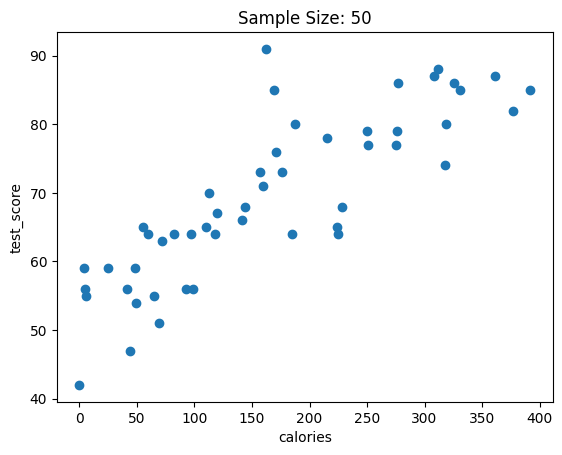

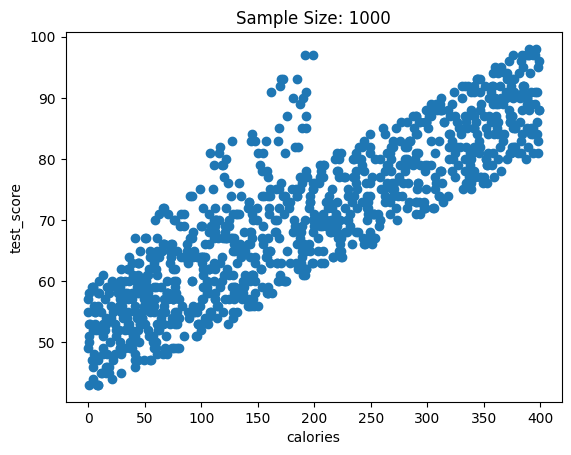

In [3]:
# Code Cell 3: 定义绘图函数并进行初次可视化
def plot_the_dataset(feature, label, number_of_points_to_plot):
  """从数据集中随机抽取 N 个点进行绘制"""
  
  # 设置坐标轴标签
  plt.xlabel(feature)
  plt.ylabel(label)

  # 随机采样
  random_examples = training_df.sample(n=number_of_points_to_plot)

  # 画散点图
  plt.scatter(random_examples[feature], random_examples[label])
  plt.title(f"Sample Size: {number_of_points_to_plot}")
  plt.show()

print("绘图函数就绪。开始侦查...")

# --- 第一次尝试：只看 50 个点 ---
# 就像在漆黑的屋子里只划了一根火柴
plot_the_dataset("calories", "test_score", number_of_points_to_plot=50)

# --- 第二次尝试：火力全开，看 1000 个点 ---
# 打开屋子里所有的灯
plot_the_dataset("calories", "test_score", number_of_points_to_plot=1000)

函数 plot_a_contiguous_portion_of_dataset 定义完成！
--- Week 1 (Rows 0-350) ---


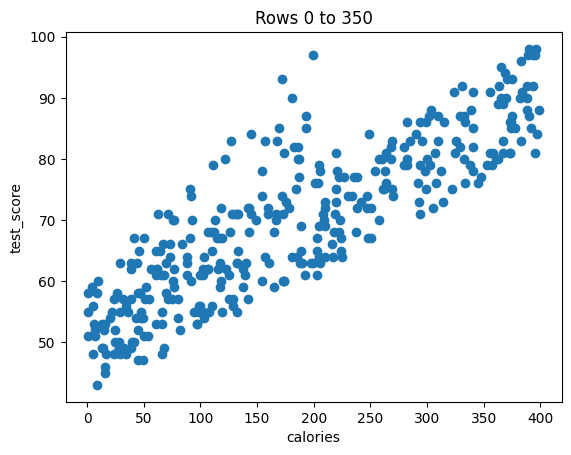

--- Week 2 (Rows 350-700) ---


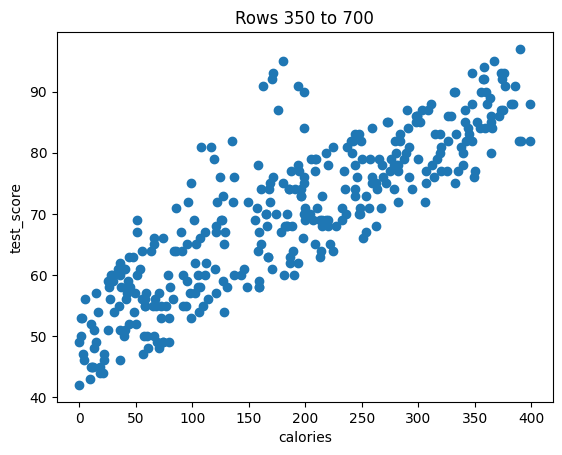

--- Week 3 (Rows 700-1050) ---


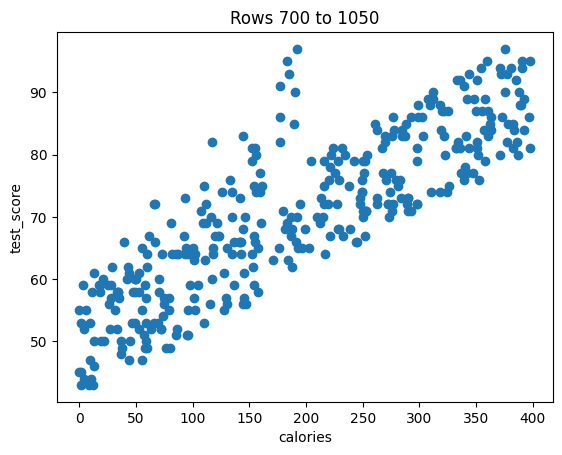

In [5]:
# --- 补充定义缺失的绘图函数 ---

def plot_a_contiguous_portion_of_dataset(feature, label, start, end):
  """绘制数据集中从 start 到 end 这一段连续的数据"""
  
  # 设置坐标轴
  plt.xlabel(feature)
  plt.ylabel(label)
  plt.title(f"Rows {start} to {end}")

  # 截取数据并绘制
  # 注意：这里我们利用 list slicing [start:end] 来截取数据
  plt.scatter(training_df[feature][start:end], training_df[label][start:end])
  
  plt.show()

print("函数 plot_a_contiguous_portion_of_dataset 定义完成！")
# Code Cell 4: 按“周”拆分数据
# 数据集一共 28 天，0-350行是第一周，350-700是第二周...

print("--- Week 1 (Rows 0-350) ---")
plot_a_contiguous_portion_of_dataset("calories", "test_score", 0, 350)

print("--- Week 2 (Rows 350-700) ---")
plot_a_contiguous_portion_of_dataset("calories", "test_score", 350, 700)

print("--- Week 3 (Rows 700-1050) ---")
plot_a_contiguous_portion_of_dataset("calories", "test_score", 700, 1050)


--- Day 0 (Rows 0 to 50) ---


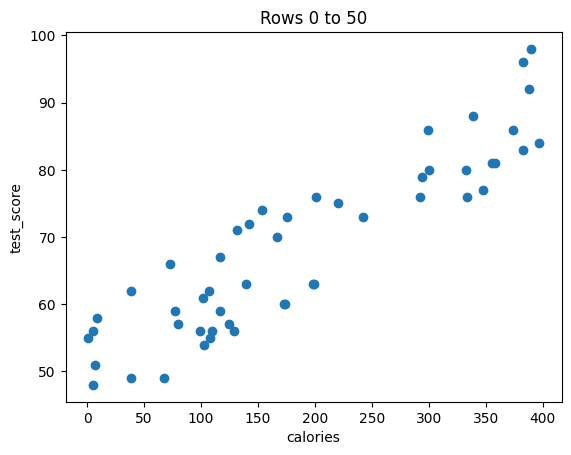


--- Day 1 (Rows 50 to 100) ---


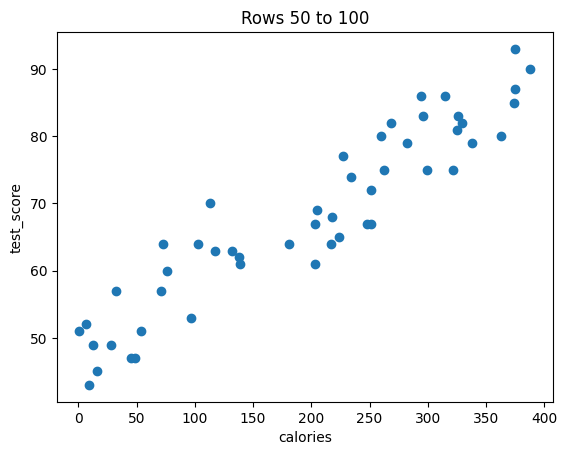


--- Day 2 (Rows 100 to 150) ---


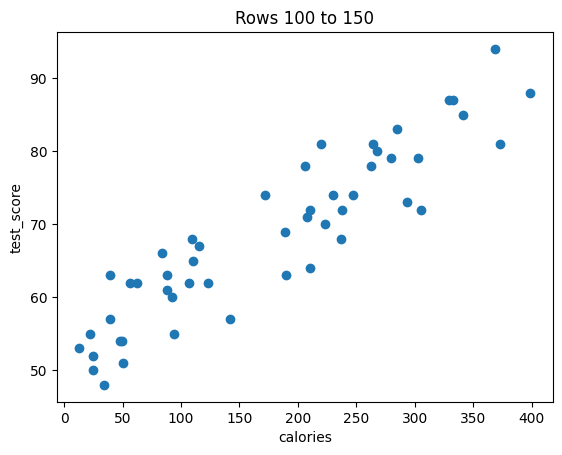


--- Day 3 (Rows 150 to 200) ---


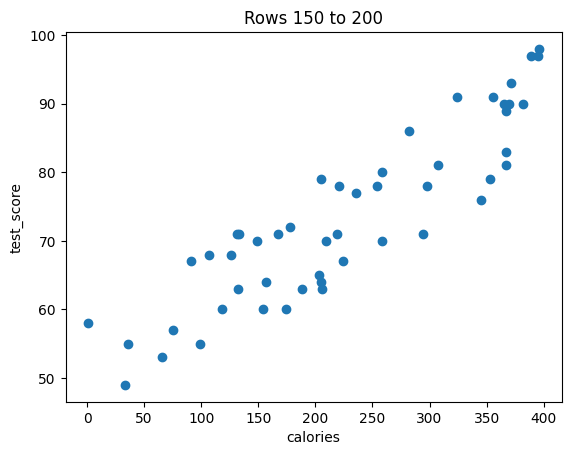


--- Day 4 (Rows 200 to 250) ---


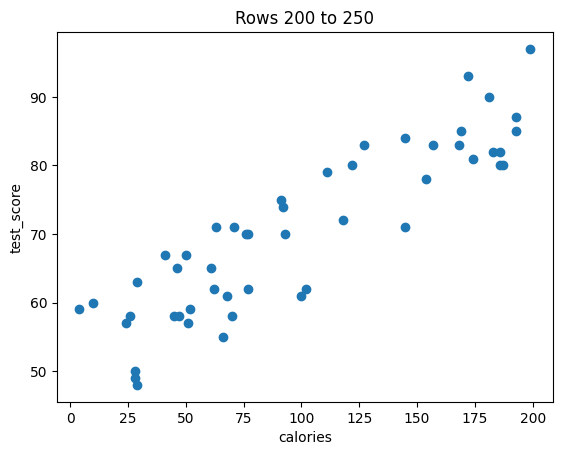


--- Day 5 (Rows 250 to 300) ---


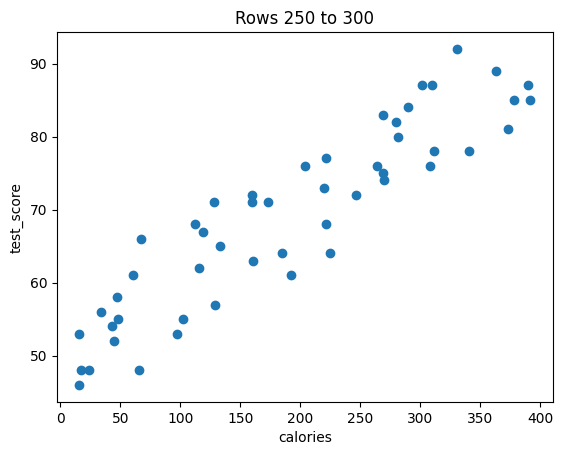


--- Day 6 (Rows 300 to 350) ---


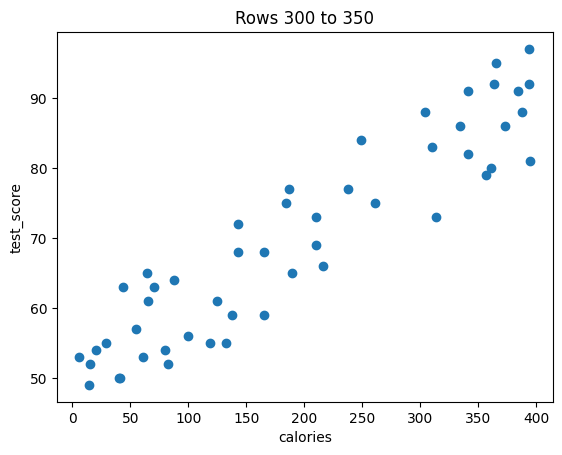

In [6]:
# Code Cell 5: 按“天”进行地毯式搜索
# 我们把第一周的7天（Day 0 - Day 6）分别画出来

for day_index in range(7):
    # 每天有 50 个学生的数据
    start = day_index * 50
    end = start + 50
    
    print(f"\n--- Day {day_index} (Rows {start} to {end}) ---")
    plot_a_contiguous_portion_of_dataset("calories", "test_score", start, end)

In [7]:
# Code Cell 6: 铁证如山 - 计算每一天的平均卡路里
# 1. 创建一个新列 'day_of_week'
#    原理：行号 // 50 得到是第几天，再 % 7 得到是星期几 (0-6)
training_df['day_of_week'] = (training_df.index // 50) % 7

# 2. 按 'day_of_week' 分组，并计算 'calories' 的平均值
daily_stats = training_df.groupby('day_of_week')['calories'].mean()

print("--- 各周几的平均卡路里 ---")
print(daily_stats)

# 3. 验证嫌疑人 Day 4 是否只有别人的一半
mean_thursday = daily_stats[4]
mean_others = daily_stats.drop(4).mean()

print(f"\n星期四 (Day 4) 的平均值: {mean_thursday:.2f}")
print(f"其他日子的平均值: {mean_others:.2f}")
print(f"比例: {mean_thursday / mean_others:.2%}")

--- 各周几的平均卡路里 ---
day_of_week
0   200.3
1   208.3
2   199.5
3   201.0
4    93.0
5   196.2
6   199.8
Name: calories, dtype: float64

星期四 (Day 4) 的平均值: 93.00
其他日子的平均值: 200.86
比例: 46.30%
